In [1]:
library(igraph)


Attaching package: ‘igraph’

The following objects are masked from ‘package:stats’:

    decompose, spectrum

The following object is masked from ‘package:base’:

    union



In [2]:
parameter_m=5
g<- barabasi.game(1000,m=parameter_m,directed=F)

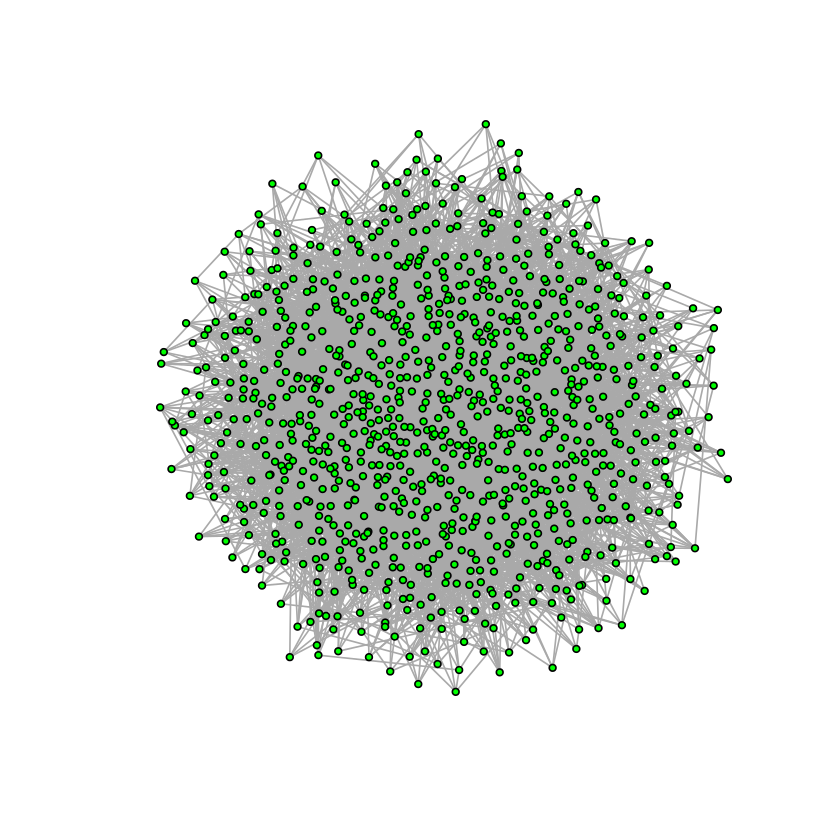

In [3]:
plot(g,vertex.color='green',vertex.size=2, vertex.label=NA)

In [4]:
getModularity<-function(g){
    fg <- fastgreedy.community(g,modularity=T)
    cmsize <- sizes(fg)
    print(cmsize)
    modularity(g, fg$membership)
}

getModularity(g)

Community sizes
  1   2   3   4   5   6   7   8   9 
192  64 215  14 231  27   7  96 154 


[1] 0.2777424

In [5]:
plotLoglog<-function(g){
    plot(degree.distribution(g),main="Degree distribution of the network",xlab="Degree",ylab="Frequency")
    logpk=log(degree.distribution(g))
    logk=log(seq(0,length(degree.distribution(g))-1))
    plot(logk,logpk,main="Degree distribution of the network(log-log scale)")
}

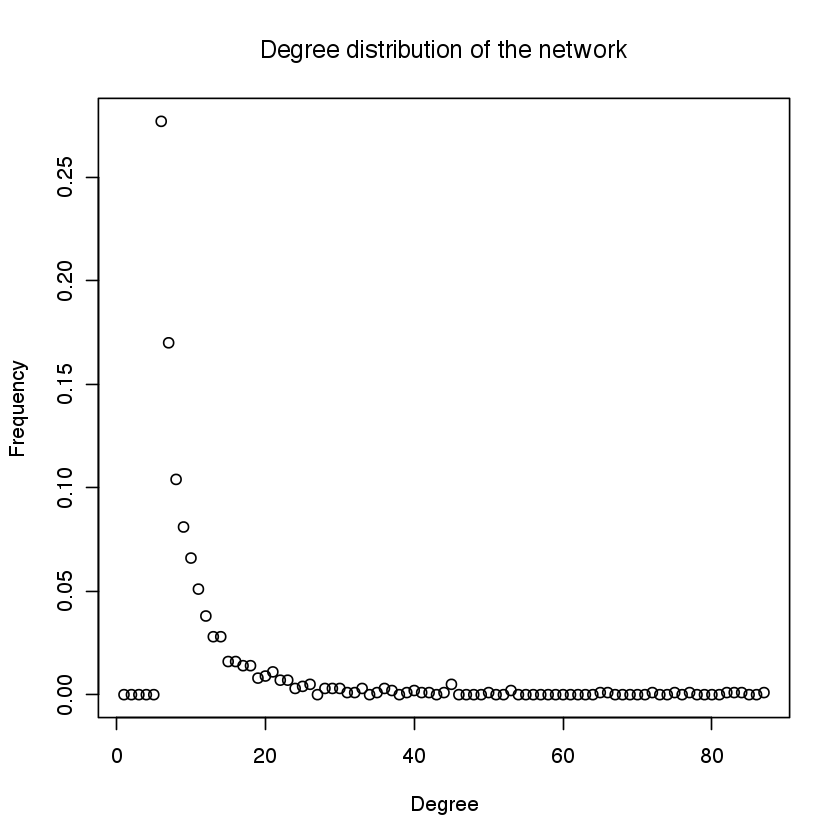

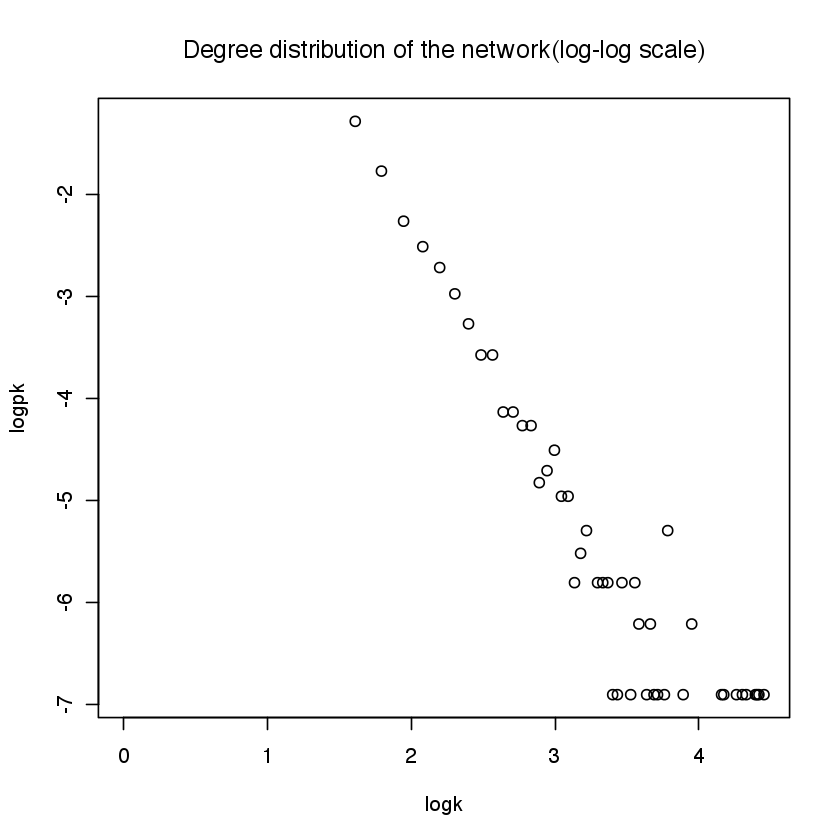

In [6]:
plotLoglog(g)

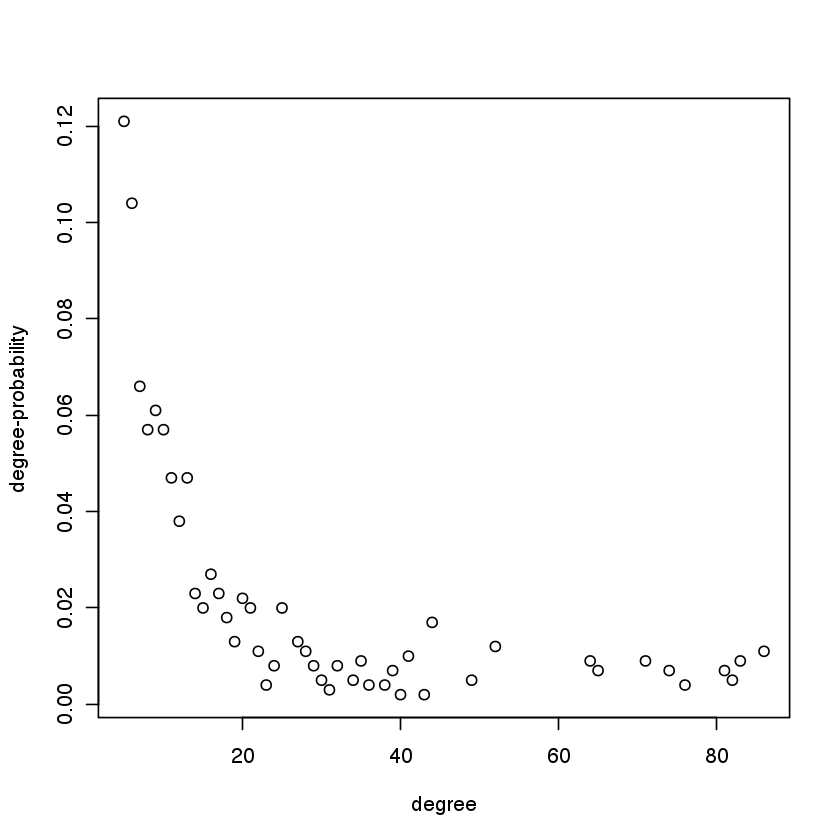

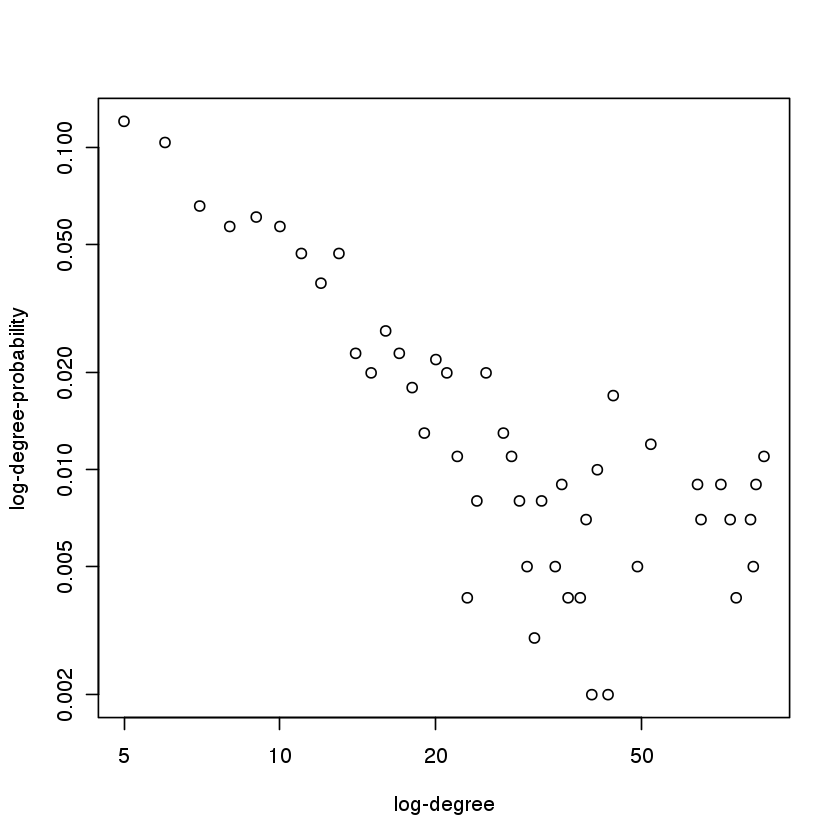

In [16]:
numSample=1000
nodes<-sample(1:1000,numSample,replace=T)
degrees<-rep(0,numSample)
for(i in 1:numSample){
    neighs=neighbors(g,nodes[i])
    randNeighbor=sample(1:length(neighs),1)
    d=degree(g,neighs[randNeighbor])
    degrees[i]=d
}
prob <- table(degrees)/numSample
plot(as.numeric(names(prob)),as.numeric(prob),xlab='degree',ylab='degree-probability')
plot(as.numeric(names(prob)),as.numeric(prob),log='xy',xlab='log-degree',ylab='log-degree-probability')

In [7]:
getAlpha<-function(g){
    d <- degree(g)
    fit <- fit_power_law(d,xmin=parameter_m)
    return(fit$alpha)
}

In [8]:
getAlpha(g)

[1] 2.690375

In [9]:
g10000<- barabasi.game(10000,m=parameter_m,directed=F)

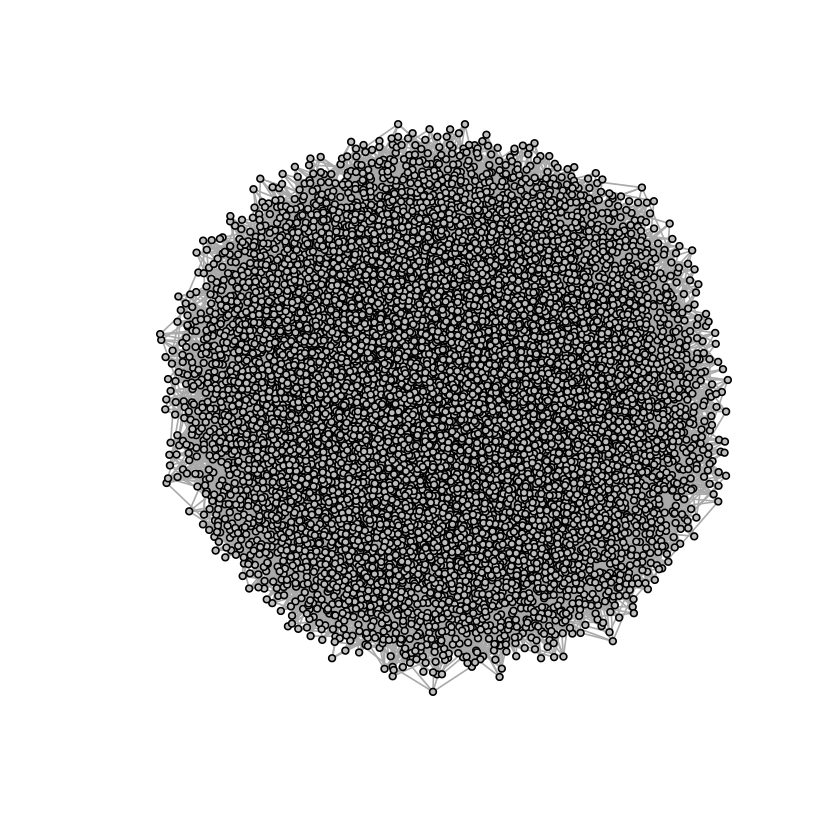

In [10]:
plot(g10000,vertex.color='grey',vertex.size=2, vertex.label=NA)

In [11]:
getModularity(g10000)

Community sizes
   1    2    3    4    5    6    7    8    9   10   11   12   13   14   15   16 
 112 1561   70  102  107 1024   44   42  129   29   68  165 1918  567  239 1777 
  17 
2046 


[1] 0.2738789

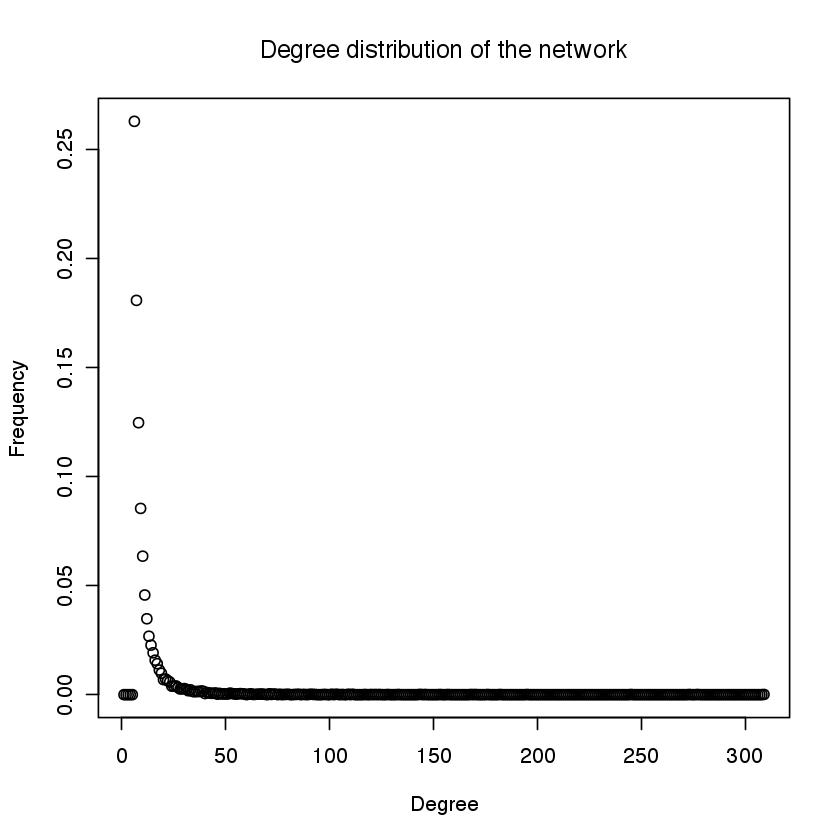

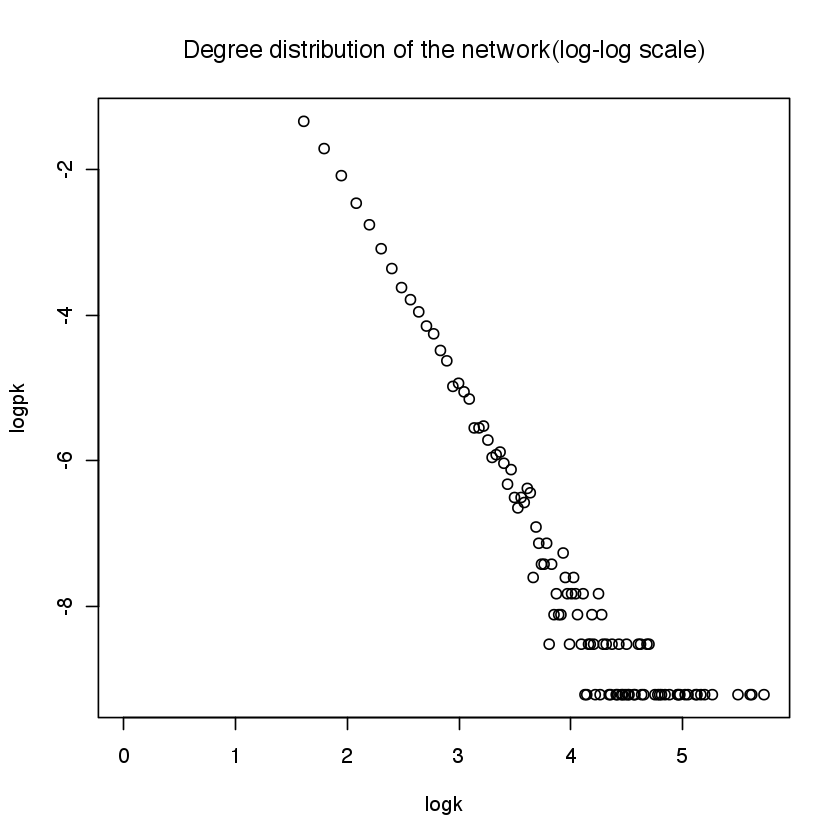

In [12]:
plotLoglog(g10000)

In [13]:
getAlpha(g10000)

[1] 2.71804

In [14]:
avgDegree<-function(age,t,m=parameter_m){
    return(m*sqrt(t/(t-age+1)))
}

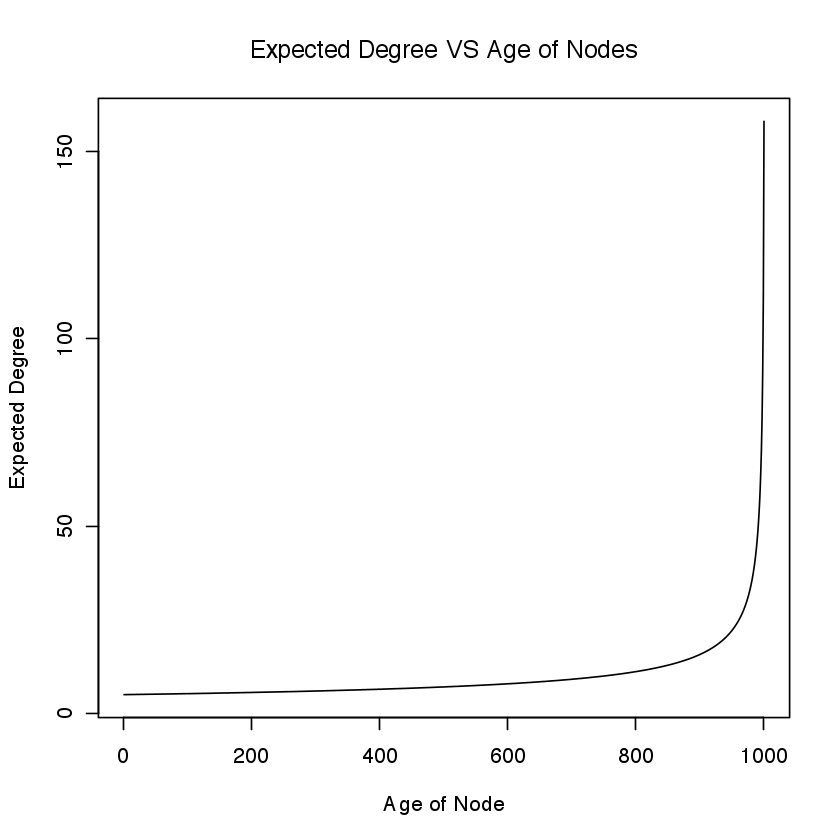

In [15]:
timestep=1000
agesequence<-seq(1,timestep)
plot(agesequence,avgDegree(agesequence,timestep,m=parameter_m),type='l',main="Expected Degree VS Age of Nodes",xlab="Age of Node",ylab="Expected Degree")